In [1]:

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('mShop PI 3 Health Check (Responses) - Form responses 1 (Final).csv')
df

,Timestamp,Select your team,Trust & Safety,Dependability,Purpose,Delivering Value,Team Autonomy,Teamwork,Continuously Improve,Decisions,Sustainable pace,Feedback,Integrity,One most important thing you want to improve as soon as possible
0,24/03/2020 11:38:19,Other,4,4,2,4,4,4,2,4,3,2,3,NaN
1,24/03/2020 11:43:22,Other,9,8,8,5,7,8,8,8,8,8,8,Set focus more on quality
2,24/03/2020 12:14:59,Other,7,8,7,4,4,6,4,6,3,4,4,"Structure, organization, communication"
3,16/03/2020 11:52:19,Team Blue,8,10,8,8,9,10,8,8,6,8,6,not to plan 100% capacity but make place for u...
4,16/03/2020 11:58:52,Team Blue,10,7,6,4,1,4,5,1,4,5,5,Add a business value for each team task.
5,16/03/2020 12:00:18,Team Blue,8,8,8,5,6,8,7,5,8,7,7,customer collaboration
6,16/03/2020 12:25:23,Team Blue,10,10,10,10,10,6,7,8,10,8,6,reduce the number of meetings
7,16/03/2020 12:36:44,Team Blue,9,7,4,4,6,8,6,6,7,6,7,"Much less leftovers - maybe take less, but imp..."
8,16/03/2020 12:59:58,Team Blue,8,8,3,6,7,7,7,7,6,9,7,"I want to receive feedback from the customer, ..."
9,16/03/2020 13:03:35,Team Blue,9,9,8,9,7,7,9,7,6,8,7,NaN


In [12]:
df1 = pd.read_csv('mShop PI 3 Health Check (Responses) - Form responses 1.csv')
df1

,Timestamp,Select your team,Trust & Safety,Dependability,Purpose,Delivering Value,Team Autonomy,Teamwork,Continuously Improve,Decisions,Sustainable pace,Feedback,Integrity,One most important thing you want to improve as soon as possible
0,24/03/2020 11:38:19,Other,4,4,2,4,4,4,2,4,3,2,3,NaN
1,24/03/2020 11:43:22,Other,9,8,8,5,7,8,8,8,8,8,8,Set focus more on quality
2,24/03/2020 12:14:59,Other,7,8,7,4,4,6,4,6,3,4,4,"Structure, organization, communication"
3,16/03/2020 11:52:19,Team Blue,8,10,8,8,9,10,8,8,6,8,6,not to plan 100% capacity but make place for u...
4,16/03/2020 11:58:52,Team Blue,10,7,6,4,1,4,5,1,4,5,5,Add a business value for each team task.
5,16/03/2020 12:00:18,Team Blue,8,8,8,5,6,8,7,5,8,7,7,customer collaboration
6,16/03/2020 12:25:23,Team Blue,10,10,10,10,10,6,7,8,10,8,6,reduce the number of meetings
7,16/03/2020 12:36:44,Team Blue,9,7,4,4,6,8,6,6,7,6,7,"Much less leftovers - maybe take less, but imp..."
8,16/03/2020 12:59:58,Team Blue,8,8,3,6,7,7,7,7,6,9,7,"I want to receive feedback from the customer, ..."
9,16/03/2020 13:03:35,Team Blue,9,9,8,9,7,7,9,7,6,8,7,NaN


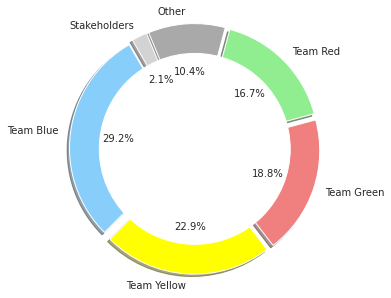

In [35]:
df = df.drop(['Timestamp','One most important thing you want to improve as soon as possible'], axis=1)

teams = df['Select your team'].value_counts(normalize=True)
plt.figure(figsize=(5,5))

colors = {'Team Blue':'lightskyblue', 'Team Yellow':'yellow', 'Team Red':'lightcoral', 'Team Green':'lightgreen', 'Stakeholders':'darkgrey', 'Other':'lightgrey'}
colors_inv = dict(zip(colors.values(), colors.keys()))
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

plt.pie(teams, autopct='%1.1f%%',labels=teams.index, colors=colors_inv,explode=explode, shadow=True, startangle=120)
plt.axis('equal')

centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# plt.tight_layout()
plt.ylabel("")
plt.savefig('piechart.png')


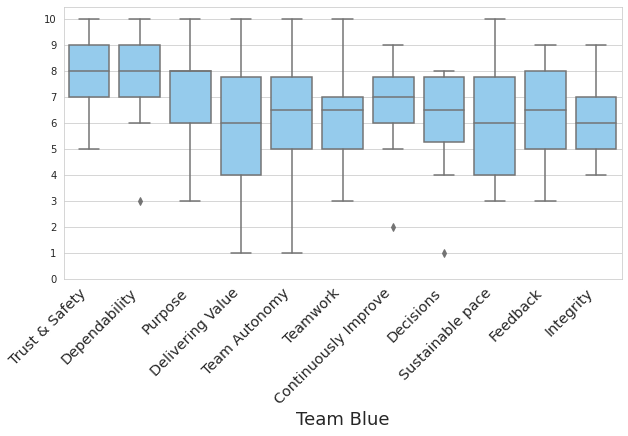

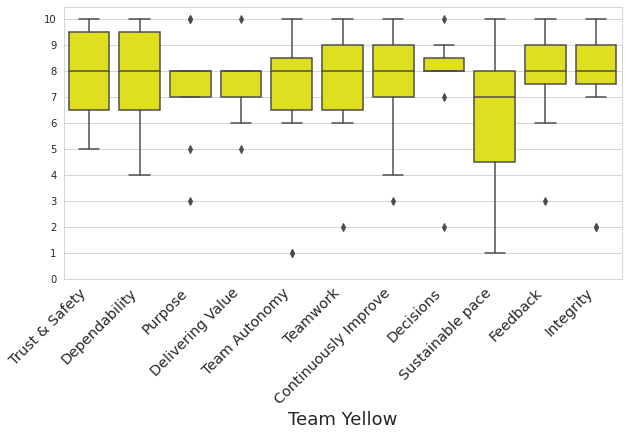

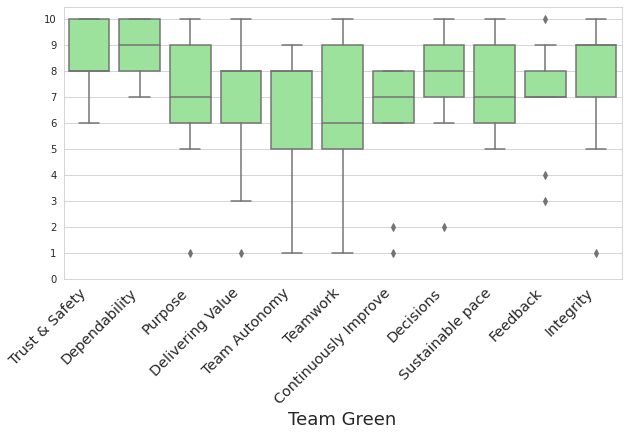

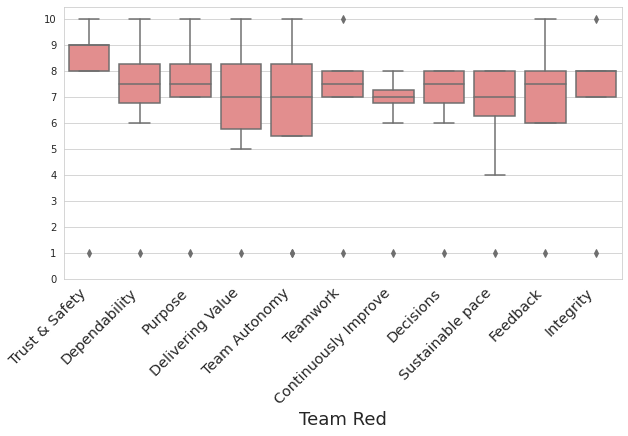

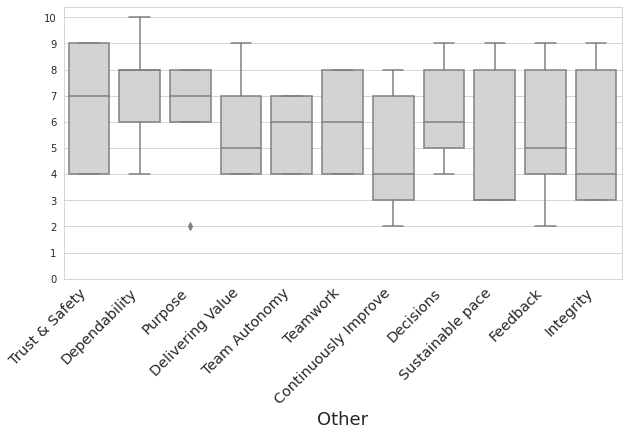

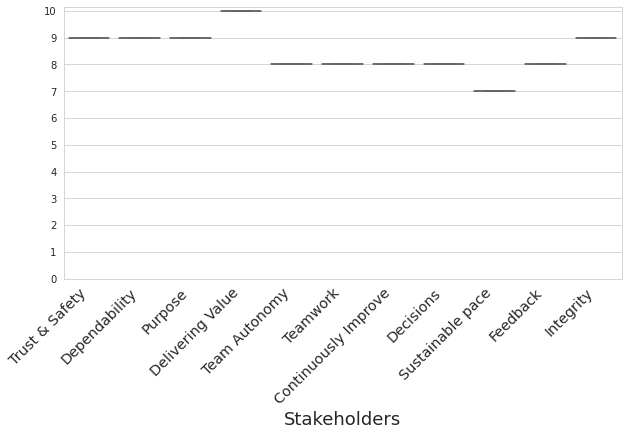

In [52]:

for team in teams.index: 
    plt.figure(figsize=(10,5))
    sns.set_style("whitegrid")
    color = colors[team]
    data = df.loc[df['Select your team'] == team]
    chart = sns.boxplot(data=data, color=color)
#         sns.set_style("ticks", {"ytick.major.size":10})
    chart.set_yticks(np.arange(0, 11, step=1))
    chart.set_xlabel(team, fontsize=18)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')
    plt.savefig('results_by_team_'+ team +'.png', bbox_inches='tight')
    
        

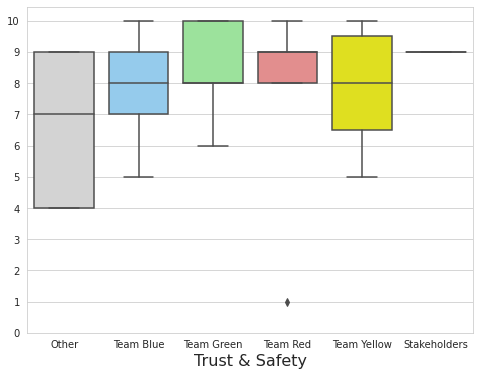

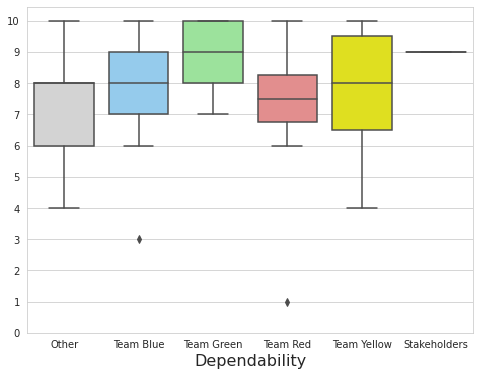

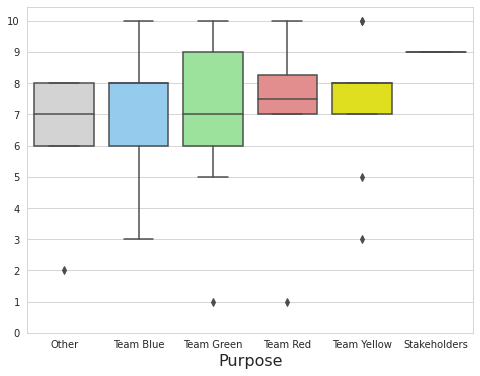

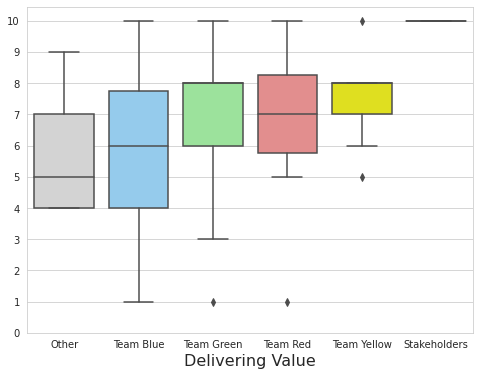

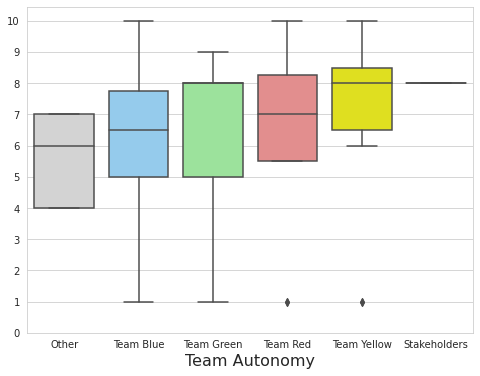

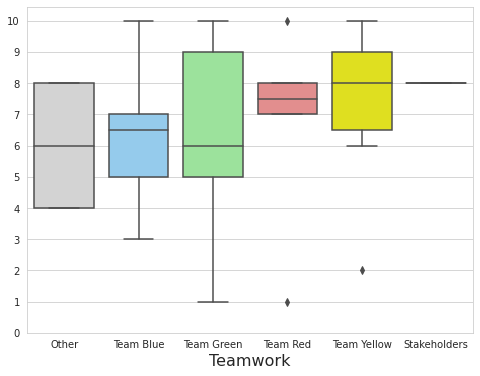

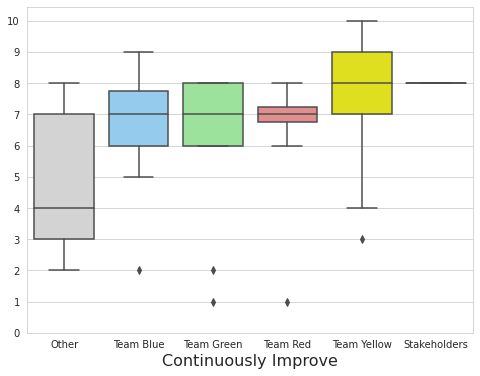

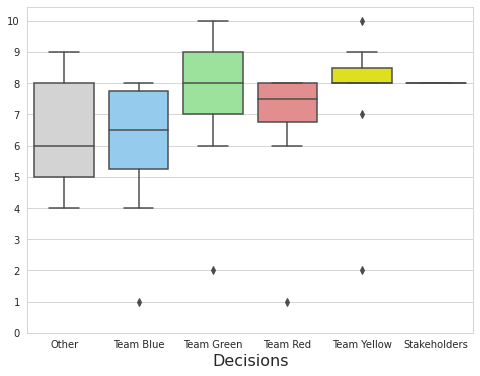

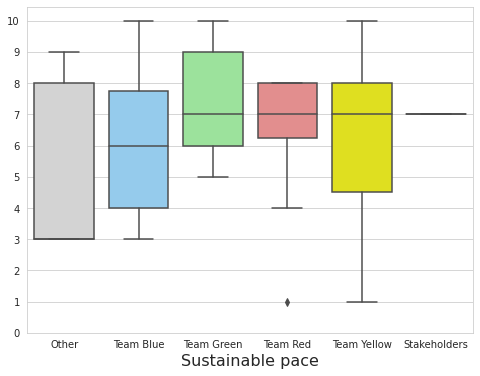

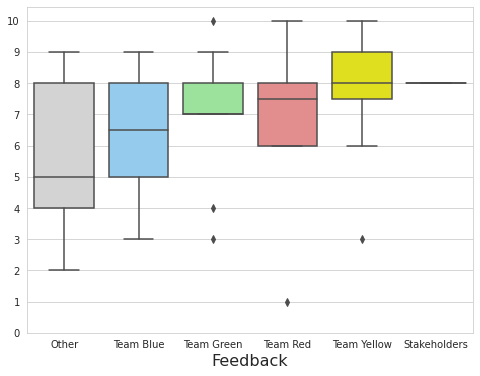

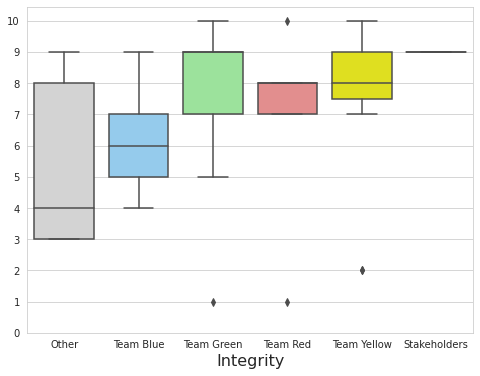

In [57]:
columns = df.drop(['Select your team'], axis=1)

# df_less=df.drop(['Timestamp'], axis=1)

for column in columns: 
    plt.figure(figsize=(8,6))
    sns.set_style("whitegrid")
#     sns.set_style("ticks", {"xtick.major.size": 1, "ytick.major.size": 1})
    chart = sns.boxplot(x='Select your team', y=column, data=df, palette=colors)

    chart.set_yticks(np.arange(0, 11, step=1))
    chart.set_xlabel(column, fontsize=16)
    chart.set_ylabel('', fontsize=16)

#     chart.set_xticklabels(chart.get_xticklabels(), horizontalalignment='right', fontweight='light', fontsize='x-large')
#     chart.set_yticklabels(chart.get_yticklabels(), fontweight='light', fontsize='x-large')
    plt.savefig('results_'+ column +'.png', bbox_inches='tight')

    

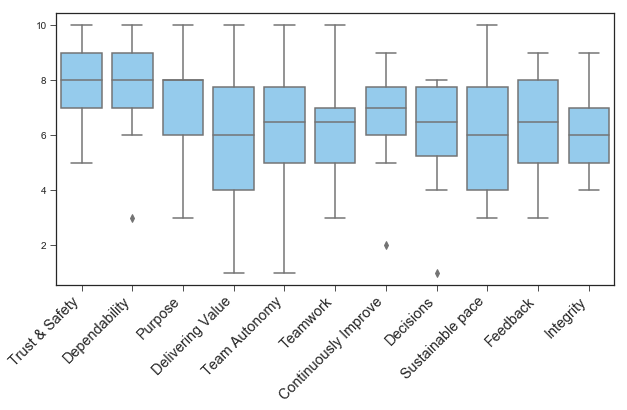

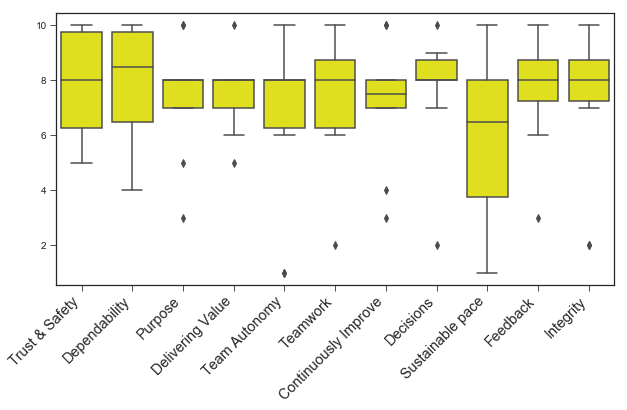

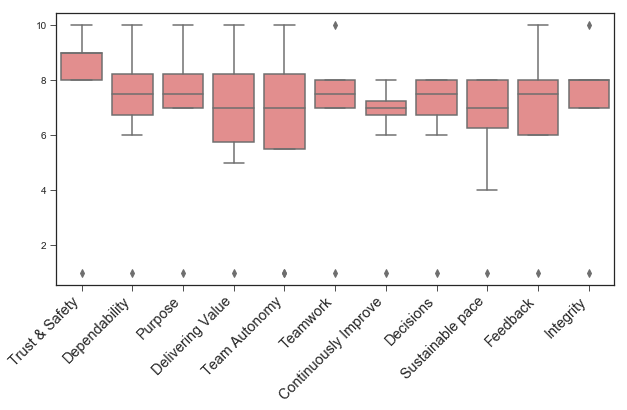

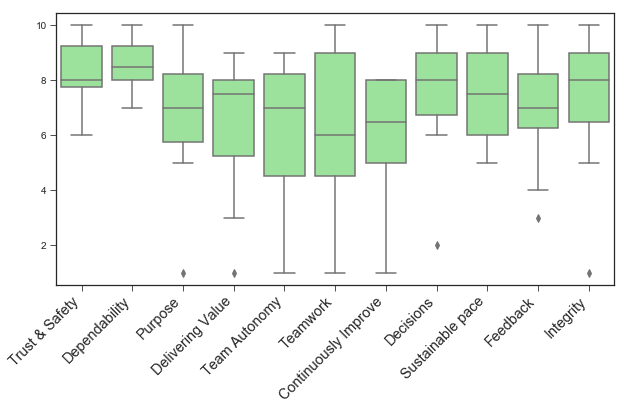

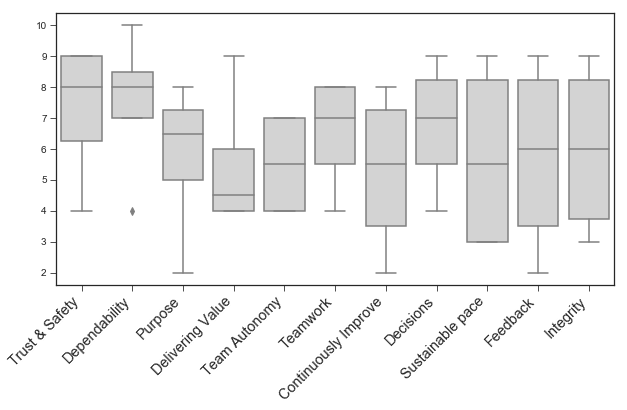

In [11]:

for team in teams.index: 
    plt.figure(figsize=(10,5))
    sns.set_style("ticks")
#     sns.set_style("ticks", {"xtick.major.size": 1, "ytick.major.size": 1})
    color = colors[team]
    data = df.loc[df['Select your team'] == team]
    chart = sns.boxplot(data=data, color=color)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontweight='light', fontsize='x-large')

        